Code Definitions

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Loading Iris Data

In [36]:
iris = load_iris()
X = iris.data # Use only the features
feature_names = iris.feature_names

print("Shape of feature data X:", X.shape)

print("Feature names:", feature_names)
print("Target names (species):", iris.target_names)
print("First 5 rows of X:\n", X[:5])


Shape of feature data X: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (species): ['setosa' 'versicolor' 'virginica']
First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [37]:
# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Store inertia values for different K
# inertias = []
K_values = range(2, 8)
kmeans_models = {} # To store fitted models
wcss_values = [] # To store WCSS for each K

# Run K-means for K = 2 to 7
for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, random_state=42)
    kmeans.fit(X)
    #inertias.append(kmeans.inertia_)
        # Store the model and WCSS
    kmeans_models[k] = kmeans
    wcss_values.append(kmeans.inertia_) # inertia_ is the WCSS
    print(f"K-means with K={k} completed. WCSS = {kmeans.inertia_:.2f}")



K-means with K=2 completed. WCSS = 152.35
K-means with K=3 completed. WCSS = 78.85
K-means with K=4 completed. WCSS = 57.23
K-means with K=5 completed. WCSS = 46.45
K-means with K=6 completed. WCSS = 39.04
K-means with K=7 completed. WCSS = 34.31


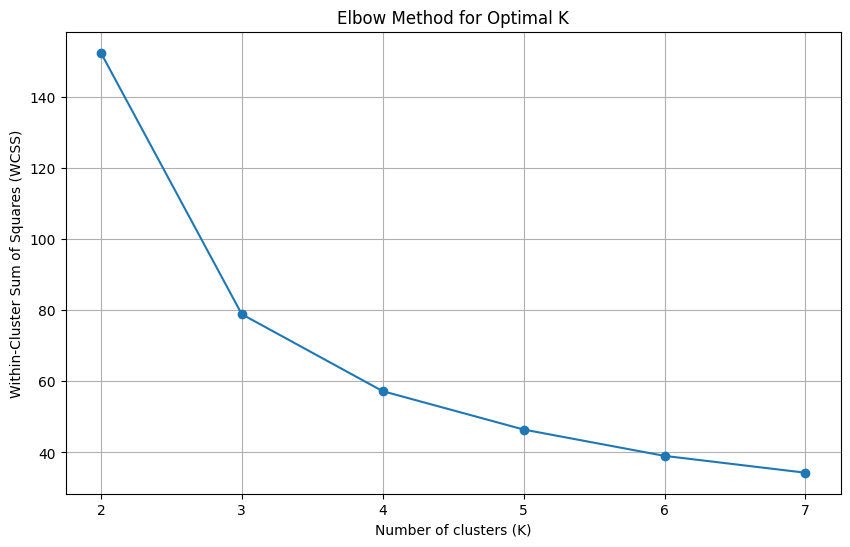

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(K_values, wcss_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_values)
plt.grid(True)
plt.show()

In [39]:
y_true = iris.target
y_kmeans = kmeans.fit_predict(X)
print("Unique target values:", np.unique(y_true))
print("Shape of target y_true:", y_true.shape)

Unique target values: [0 1 2]
Shape of target y_true: (150,)


In [40]:
optimal_k = 3
kmeans_optimal = kmeans_models[optimal_k]
cluster_labels_optimal = kmeans_optimal.labels_
centroids_optimal = kmeans_optimal.cluster_centers_

print(f"Centroids for K={optimal_k}:\n{centroids_optimal}")

Centroids for K=3:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


1️⃣ Visualization (first two features)

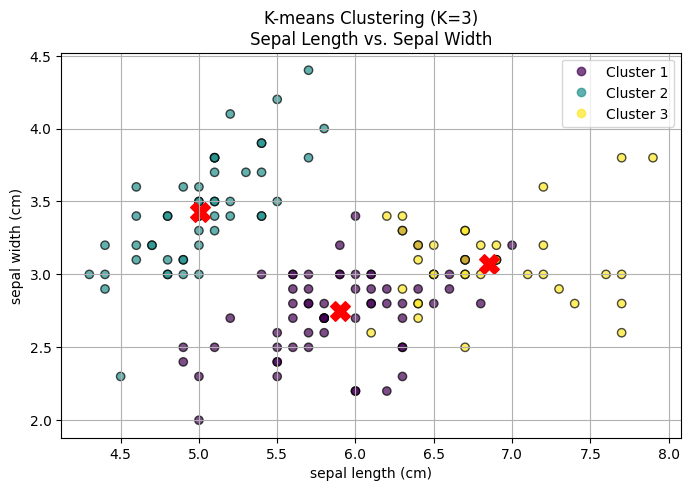

In [41]:
# Plotting the clusters with K=3 (as an example)
plt.figure(figsize=(8, 5))
scatter1 = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_optimal, cmap='viridis', alpha=0.7, edgecolors='k')
# Plot centroids
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'K-means Clustering (K={optimal_k})\nSepal Length vs. Sepal Width')
plt.legend(handles=scatter1.legend_elements()[0], labels=[f'Cluster {i}' for i in range(1, optimal_k+1)])
plt.grid(True)

 2️⃣ Visualization (true labels)

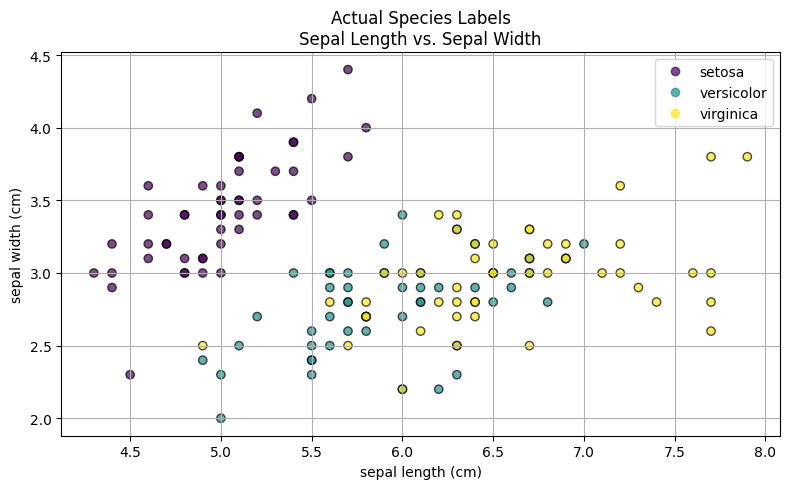

In [42]:

plt.figure(figsize=(8, 5))
scatter2 = plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Actual Species Labels\nSepal Length vs. Sepal Width')
plt.legend(handles=scatter2.legend_elements()[0], labels=iris.target_names.tolist())
plt.grid(True)

plt.tight_layout()
plt.show()

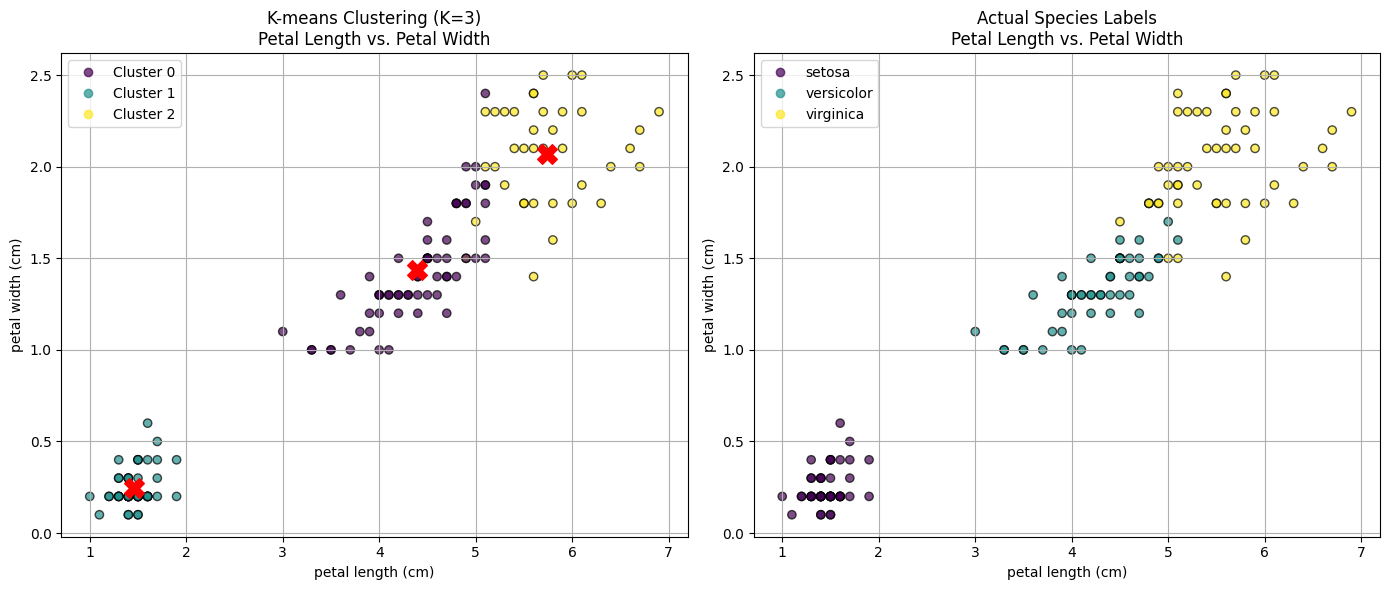

In [43]:
plt.figure(figsize=(14, 6))

# Plot 1: Clustering results from K-means (Petal dimensions)
plt.subplot(1, 2, 1)
scatter1_petal = plt.scatter(X[:, 2], X[:, 3], c=cluster_labels_optimal, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(centroids_optimal[:, 2], centroids_optimal[:, 3], marker='X', s=200, c='red', label='Centroids')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title(f'K-means Clustering (K={optimal_k})\nPetal Length vs. Petal Width')
plt.legend(handles=scatter1_petal.legend_elements()[0], labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.grid(True)

# Plot 2: Actual species labels (Petal dimensions)
plt.subplot(1, 2, 2)
scatter2_petal = plt.scatter(X[:, 2], X[:, 3], c=y_true, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Actual Species Labels\nPetal Length vs. Petal Width')
plt.legend(handles=scatter2_petal.legend_elements()[0], labels=iris.target_names.tolist())
plt.grid(True)

plt.tight_layout()
plt.show()

3️⃣ Evaluation using Adjusted Rand Index

In [44]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_true, cluster_labels_optimal)
print(f"Adjusted Rand Index (ARI) for K={optimal_k}: {ari_score:.4f}")

Adjusted Rand Index (ARI) for K=3: 0.7302


simple Softmax classifier on the same dataset using cross-validation

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42, stratify=y_true)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Softmax classifier (multinomial logistic regression)
softmax_clf = LogisticRegression( solver='lbfgs', max_iter=500, random_state=42)
softmax_clf.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = softmax_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Cross-validation accuracy (optional)
cv_scores = cross_val_score(softmax_clf, X, y_true, cv=5)
print(f"Cross-validated Accuracy (5-fold): {cv_scores.mean():.4f}")

Test Set Accuracy: 0.9111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Cross-validated Accuracy (5-fold): 0.9733


#### Here’s how the Softmax (multinomial logistic regression) classifier performed on the Iris dataset:

Test Set Accuracy: 91.11%

Precision/Recall/F1 scores are high across all three classes.

The confusion matrix shows only one misclassification (one Versicolor flower predicted as Virginica).

#### Comparison with K-means Clustering

| Metric/Aspect          | K-means (K=3)                                          | Softmax Classifier           |
| ---------------------- | ------------------------------------------------------ | ---------------------------- |
| **Type**               | Unsupervised                                           | Supervised                   |
| **Objective**          | Minimize within-cluster SS                             | Maximize likelihood/log-loss |
| **Performance Metric** | ARI ≈ 0.73  (Setosa well separated, overlap in others) | Accuracy ≈ 0.91              |
| **Interpretability**   | Cluster centroids and distances                        | Model coefficients available |
| **Assumptions**        | Spherical clusters, equal variance                     | Linear decision boundaries   |


### Advantages & Limitations
#### Supervised (Softmax)

- Advantages:

    - Leverages true labels → higher predictive accuracy (≈ 97%).

    - Provides probabilistic outputs, interpretable coefficients.

    - Can model class boundaries more flexibly (multinomial logistic).

- Limitations:

    - Requires labeled data for training.

    - May overfit if data are scarce or not representative.

#### Unsupervised (K-means)

- Advantages:

    - Discovers inherent groupings without labels.

    - Useful for exploratory data analysis or clustering new, unlabeled data.

- Limitations:

    - Performance (ARI ≈ 0.73) lower than supervised methods.

    - Struggles when natural clusters are not spherical or linearly separable (e.g., Versicolor vs. Virginica overlap).

    - Choice of K and initialization affect results.